In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import math

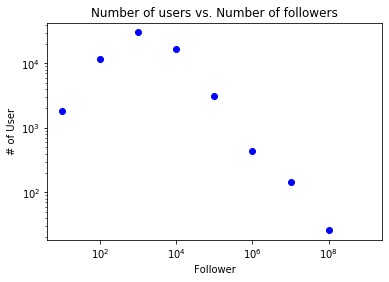

In [11]:
'''
Read data from the file and check the format about the data
'''
df = pd.read_csv('./NewTweetInfo.csv')
'''
Modification on the data and separate them as Attribute and Target
'''
X = df.iloc[:, 3]     # User Id
# frequencies
Y = df.iloc[:, 5]     # Follower Number

x_ = [10**i for i in range(1,10)]
y_ = [0] * len(x_)
for val in Y:
    if val == 0:
        continue
    temp = int(math.log(val,10))
    y_[temp] += 1
plt.plot(x_,y_,"bo")
plt.title("Number of users vs. Number of followers")
plt.xlabel("Follower")
plt.ylabel("# of User")
plt.xscale("log")
plt.yscale("log")
plt.show()


In [75]:
Important = 1000
l = ['Tweet_time','FollowerCount']
time = df.loc[:, df.columns.isin(l)]
t = list(time['Tweet_time'])
f_count = list(time['FollowerCount'])
res = []
for index in range(len(t)):
    res.append((t[index],f_count[index]))
print(res)

[('Sat Feb 29 09:48:39 +0000 2020', 171), ('Fri Mar 06 20:08:36 +0000 2020', 18871), ('Sun Jan 26 08:59:07 +0000 2020', 164), ('Wed Mar 04 22:11:27 +0000 2020', 1558), ('Fri Mar 20 20:30:31 +0000 2020', 681), ('Sat Mar 07 05:55:33 +0000 2020', 77), ('Thu Feb 27 17:27:21 +0000 2020', 13462), ('Fri Feb 21 21:24:24 +0000 2020', 182), ('Mon Mar 16 01:26:26 +0000 2020', 6781), ('Tue Mar 10 03:23:26 +0000 2020', 62), ('Sun Feb 16 09:27:05 +0000 2020', 24), ('Sun Mar 08 04:21:19 +0000 2020', 338), ('Mon Feb 10 15:57:39 +0000 2020', 346), ('Mon Feb 10 11:03:29 +0000 2020', 13922), ('Sat Feb 29 14:11:26 +0000 2020', 1491), ('Sat Feb 08 22:23:27 +0000 2020', 43), ('Sun Mar 01 19:27:17 +0000 2020', 24339), ('Mon Feb 17 02:30:00 +0000 2020', 1380), ('Sat Mar 14 17:33:53 +0000 2020', 354), ('Thu Mar 19 11:17:53 +0000 2020', 93), ('Tue Jan 28 18:42:26 +0000 2020', 1222), ('Mon Feb 17 06:40:57 +0000 2020', 3652), ('Sat Mar 14 01:19:56 +0000 2020', 4381), ('Sun Jan 26 01:04:29 +0000 2020', 62), ('Sat 

In [76]:
important_user = [0]* 92
unimportant_user = [0] * 92
for val in res:
    t = 0
    if val[0][4:7] == "Feb":
        t += 31 + int(val[0][8:10])
    elif val[0][4:7] == "Mar":
        t += 60 + int(val[0][8:10])
    else:
        t += int(val[0][8:10])
    if int(val[1]) > Important:
        important_user[t] += 1
    else:
        unimportant_user[t] += 1
print(important_user)
print(unimportant_user)
    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 18, 66, 192, 240, 290, 263, 275, 467, 623, 573, 257, 239, 275, 303, 267, 349, 268, 256, 264, 327, 322, 299, 324, 314, 264, 271, 302, 296, 286, 299, 363, 261, 0, 254, 297, 334, 347, 681, 1292, 991, 283, 1020, 1067, 337, 347, 303, 303, 330, 307, 322, 253, 274, 255, 247, 263, 259, 247, 297, 263, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 24, 113, 410, 640, 899, 658, 514, 1222, 1379, 1302, 538, 650, 589, 659, 643, 629, 617, 594, 569, 604, 624, 570, 646, 575, 535, 558, 559, 650, 583, 636, 598, 571, 0, 539, 567, 712, 710, 1194, 2195, 1614, 612, 1926, 2092, 714, 748, 756, 758, 709, 704, 705, 711, 710, 743, 707, 671, 665, 594, 654, 718, 137, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


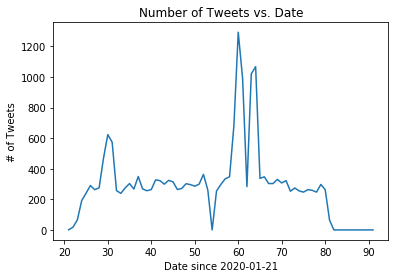

In [82]:
plt.plot([x for x in range(21,92)],important_user[21:])
plt.title("Number of Tweets from Important User vs. Date")
plt.xlabel("Date since 2020-01-21")
plt.ylabel("# of Tweets")
plt.show()

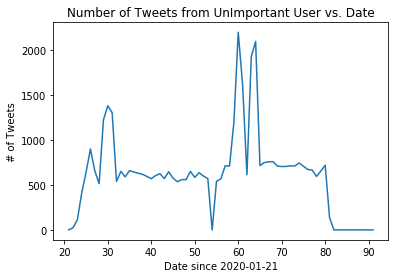

In [83]:
plt.plot([x for x in range(21,92)],unimportant_user[21:])
plt.title("Number of Tweets from UnImportant User vs. Date")
plt.xlabel("Date since 2020-01-21")
plt.ylabel("# of Tweets")
plt.show()

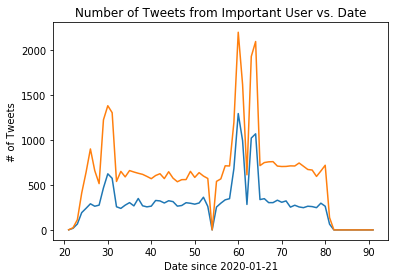

In [90]:
plt.plot([x for x in range(21,92)],important_user[21:],label = "Important User")
plt.plot([x for x in range(21,92)],unimportant_user[21:], label = "Unimportant User")
plt.title("Number of Tweets from Important User vs. Date")
plt.xlabel("Date since 2020-01-21")
plt.ylabel("# of Tweets")
plt.show()